In [1]:
import subprocess
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Spin-Locks

### Executando os estudos de caso
<hr/>

- Para $n = 10^7$, $n = 10^8$, $n = 10^9$

In [12]:
csv_file = 'results/spin_lock_test2.csv'
with open(csv_file, 'a') as f:
    f.write('n,k,time,test\n')

In [13]:
for n in range(7, 10):
    k = 1
    while(k <= 256):
        for i in range(0, 10):
            print(f'Adding 10^{n} with {k} threads: test {i}')
            try:
                out = subprocess.check_output(["./spin-locks/somador.out", f'{n}', f'{k}'])
            except subprocess.CalledProcessError as e:
                print(e.output)
                break
            else: 
                time = float(str(out).split('Time spent: ')[1][:-3])
                with open(csv_file, 'a') as f:
                    f.write(f'10^{n},{k},{time},{i}\n')
        k *= 2       

Adding 10^7 with 1 threads: test 0
Adding 10^7 with 1 threads: test 1
Adding 10^7 with 1 threads: test 2
Adding 10^7 with 1 threads: test 3
Adding 10^7 with 1 threads: test 4
Adding 10^7 with 1 threads: test 5
Adding 10^7 with 1 threads: test 6
Adding 10^7 with 1 threads: test 7
Adding 10^7 with 1 threads: test 8
Adding 10^7 with 1 threads: test 9
Adding 10^7 with 2 threads: test 0
Adding 10^7 with 2 threads: test 1
Adding 10^7 with 2 threads: test 2
Adding 10^7 with 2 threads: test 3
Adding 10^7 with 2 threads: test 4
Adding 10^7 with 2 threads: test 5
Adding 10^7 with 2 threads: test 6
Adding 10^7 with 2 threads: test 7
Adding 10^7 with 2 threads: test 8
Adding 10^7 with 2 threads: test 9
Adding 10^7 with 4 threads: test 0
Adding 10^7 with 4 threads: test 1
Adding 10^7 with 4 threads: test 2
Adding 10^7 with 4 threads: test 3
Adding 10^7 with 4 threads: test 4
Adding 10^7 with 4 threads: test 5
Adding 10^7 with 4 threads: test 6
Adding 10^7 with 4 threads: test 7
Adding 10^7 with 4 t

### Analisando os resultados
<hr/>

In [14]:
spin_lock_df = pd.read_csv('results/spin_lock_test2.csv')
spin_lock_df.head()

,n,k,time,test
0,10^7,1,0.032981,0
1,10^7,1,0.033148,1
2,10^7,1,0.036306,2
3,10^7,1,0.034348,3
4,10^7,1,0.087074,4


Text(0.5, 1.0, '10^9 numbers')

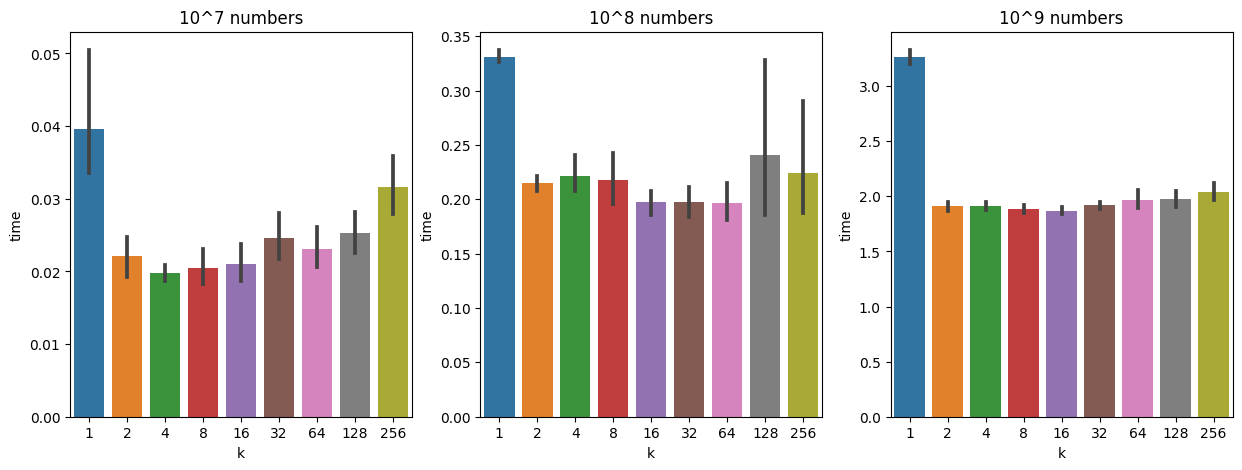

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 10^7
sns.barplot(ax=axes[0], data=spin_lock_df[spin_lock_df['n'] == '10^7'], x='k', y='time')
axes[0].set_title('10^7 numbers')


# 10^8
sns.barplot(ax=axes[1], data=spin_lock_df[spin_lock_df['n'] == '10^8'], x='k', y='time')
axes[1].set_title('10^8 numbers')

# 10^9
sns.barplot(ax=axes[2], data=spin_lock_df[spin_lock_df['n'] == '10^9'], x='k', y='time')
axes[2].set_title('10^9 numbers')


## Spin-Locks

### Executando os estudos de caso
<hr/>

In [4]:
csv_file = 'results/semaforo_tests2.csv'
with open(csv_file, 'a') as f:
    f.write('n,np,nc,time,test\n')

In [ ]:
for n in [1,10,100,1000]:
    t = [[1,1],[1,2],[1,4],[1,8],[2,1],[4,1],[8,1]]
    for pc in t:
        print(n,pc[0], pc[1])
        for i in range(1, 10):
            try:
                print(f'Mem: {n} with {pc[0]} and {pc[1]} threads')
                out = subprocess.check_output(["./Semaforo/produtor-consumidor.out", f'{pc[0]}', f'{pc[1]}', f'{n}'])
            except subprocess.CalledProcessError as e:
                print(e.output)
                break
            else:
                print(str(out))
                time = float(str(out).split(' tempo: ')[1][:-3])
                with open(csv_file, 'a') as f:
                    f.write(f'{n},{pc[0]},{pc[1]},{time},{i}\n')
           

### Analisando os resultados
<hr/>

In [14]:
semaforo_df = pd.read_csv('results/semaforo_tests2.csv')
semaforo_df['[Produtores, Consumidores]'] = semaforo_df.loc[:, ['np', 'nc']].apply(lambda x: str(list(x)), axis=1)

Text(0.5, 1.0, '1000 numbers')

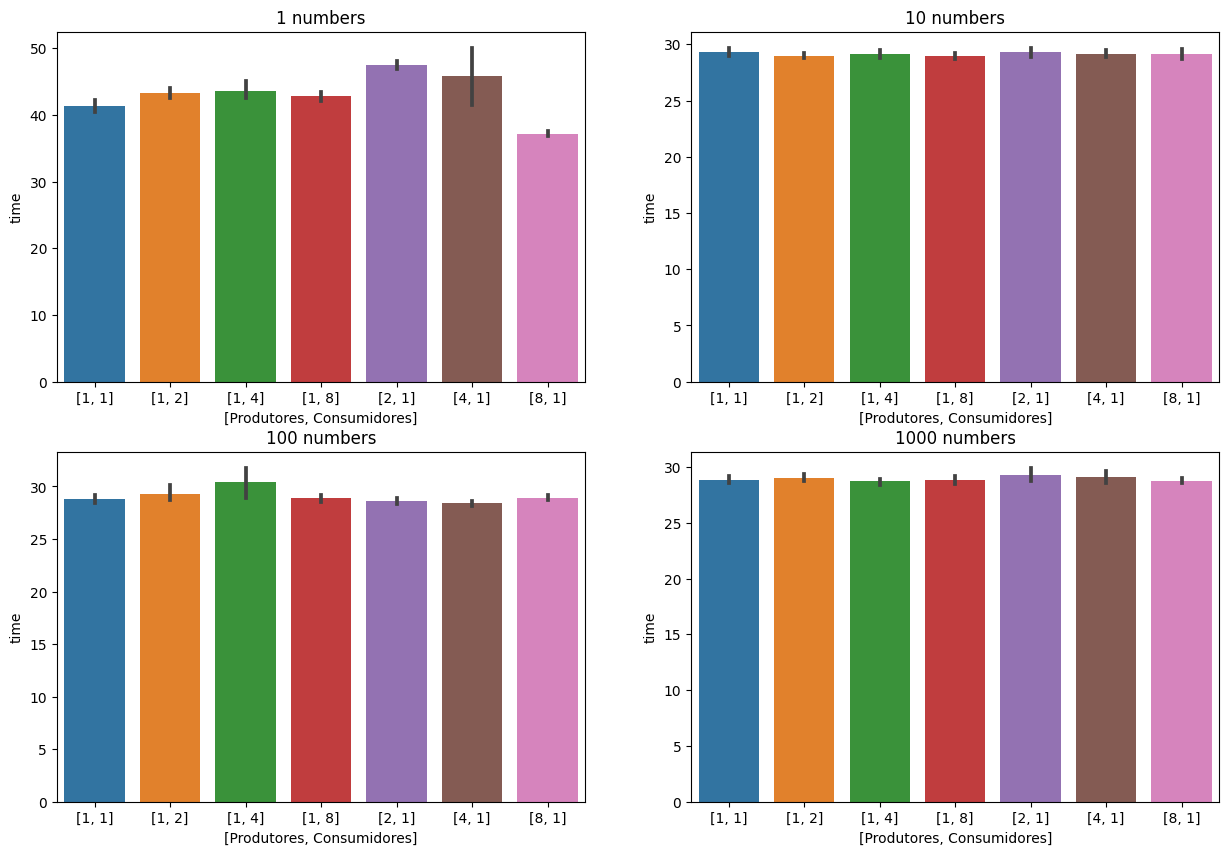

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1
sns.barplot(ax=axes[0, 0], data=semaforo_df[semaforo_df['n'] == 1], x='[Produtores, Consumidores]', y='time')
axes[0, 0].set_title('1 numbers')


# 10
sns.barplot(ax=axes[0, 1], data=semaforo_df[semaforo_df['n'] == 10], x='[Produtores, Consumidores]', y='time')
axes[0, 1].set_title('10 numbers')

# 100
sns.barplot(ax=axes[1, 0], data=semaforo_df[semaforo_df['n'] == 100], x='[Produtores, Consumidores]', y='time')
axes[1, 0].set_title('100 numbers')


# 1000
sns.barplot(ax=axes[1, 1], data=semaforo_df[semaforo_df['n'] == 1000], x='[Produtores, Consumidores]', y='time')
axes[1, 1].set_title('1000 numbers')

